In [4]:
import numpy
from urllib.request import urlopen
import scipy.optimize
import random
import gzip

In [5]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error

In [64]:
from sklearn.metrics import precision_score, confusion_matrix

In [77]:
import numpy as np

In [123]:
import matplotlib.pyplot as plt

## Q2

In [6]:
def parseData(fname):
  for l in open(fname):
    yield eval(l)

In [7]:
print("Reading data...")
# Download from http://cseweb.ucsd.edu/classes/fa19/cse258-a/data/beer_50000.json"
data = list(parseData("fantasy_10000.json"))
print("done")

Reading data...
done


In [8]:
def feature(datum):
    return [1, datum]

In [9]:
X = [feature(len(d['review_text'])) for d in data]
y = [d['rating'] for d in data]

In [10]:
model = LinearRegression(fit_intercept=False)
model.fit(X,y)
theta = model.coef_

In [11]:
theta

array([3.68568136e+00, 6.87371675e-05])

In [12]:
y_pred = model.predict(X)

In [13]:
mean_squared_error(y, y_pred)

1.5522086622355378

#### Answer:

In [11]:
theta

array([3.68568136e+00, 6.87371675e-05])

In [13]:
mean_squared_error(y, y_pred)

1.5522086622355378

## Q3

In [14]:
import dateutil.parser

In [15]:
t = [dateutil.parser.parse(d['date_added']) for d in data]

In [16]:
t_weekdays = [[day.weekday()] for day in t]

In [17]:
t_years = [[day.year] for day in t]

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
enc = OneHotEncoder(drop='first', handle_unknown='error')

In [20]:
weekdays_onehot = enc.fit_transform(t_weekdays)

In [21]:
years_onehot = enc.fit_transform(t_years)

In [22]:
onehot_weekday_array = weekdays_onehot.toarray()

In [23]:
onehot_weekday_array

array([[0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [24]:
onehot_yearly_array = years_onehot.toarray()

In [25]:
onehot_yearly_array

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [26]:
onehot_yearly_array[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

#### Answer:

In [156]:
onehot_weekday_array[0:2]

array([[0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.]])

In [157]:
onehot_yearly_array[0:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [159]:
X2[:2] # Full feature vector for first two examples

[[1,
  2086,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0],
 [1,
  1521,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0]]

## Q4

### a)

In [27]:
data2 = []

In [28]:
review_lens = [len(d['review_text']) for d in data]

In [29]:
for review_len, t_weekday in zip(review_lens, t_weekdays):
    data2.append([review_len, t_weekday[0]])

In [30]:
for datum, t_year in zip(data2, t_years):
    datum.append(t_year[0])

In [31]:
def feature(datum):
    feat = [1]
    feat.extend(datum)
    return feat

In [32]:
X = [feature(datum) for datum in data2]

In [33]:
X1 = X

In [34]:
model = LinearRegression(fit_intercept=False)
model.fit(X,y)
theta = model.coef_

#### Answer:

In [35]:
mean_squared_error(y, model.predict(X))

1.5367740498705234

### b)

In [36]:
data3 = []

In [37]:
for review_len, onehot_weekday in zip(review_lens, onehot_weekday_array):
    temp = []
    temp.append(review_len)
    temp.extend(onehot_weekday)
    data3.append(temp)

In [38]:
for datum, onehot_year in zip(data3, onehot_yearly_array):
    datum.extend(onehot_year)

In [39]:
def feature(datum):
    feat = [1]
    feat.extend(datum)
    return feat

In [40]:
X = [feature(datum) for datum in data3]

In [41]:
X2 = X

In [42]:
model = LinearRegression(fit_intercept=False)
model.fit(X,y)
theta = model.coef_

In [43]:
theta

array([ 4.87171479e+00,  5.15709386e-05,  4.89003441e-02,  1.45709798e-01,
        1.06646403e-01,  1.26168316e-01,  3.83417660e-02,  1.02846903e-01,
       -1.58244783e+00, -1.70447417e+00, -1.68316056e+00, -1.67023905e+00,
       -1.62877001e+00, -1.19956705e+00, -1.10444816e+00, -1.09162361e+00,
       -1.20861354e+00, -1.23647487e+00, -1.23331225e+00])

#### Answer:

In [44]:
mean_squared_error(y, model.predict(X))

1.5123578656428203

## Q5

### a)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.5, shuffle=True)

In [47]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
theta = model.coef_

In [48]:
theta

array([-8.53882772e+01,  7.16727621e-05,  9.71171951e-03,  4.42333217e-02])

#### Answer:

In [49]:
mean_squared_error(y_test, model.predict(X_test))

1.5784109399911184

### b)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.5, shuffle=True)

In [51]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
theta = model.coef_

In [52]:
theta

array([ 4.81474119e+00,  5.82654237e-05,  9.55688967e-02,  1.08274374e-01,
        5.06383234e-02,  1.22931743e-01, -8.61136083e-03,  1.49163465e-01,
       -1.55186154e+00, -1.66152876e+00, -1.65138393e+00, -1.64772306e+00,
       -1.59665629e+00, -1.19758078e+00, -1.01320763e+00, -1.02878821e+00,
       -1.15905286e+00, -1.13496256e+00, -1.18968329e+00])

#### Answer:

In [53]:
mean_squared_error(y_test, model.predict(X_test))

1.5325127320010243

## Q7

In [85]:
print("Reading data...")
# Download from http://cseweb.ucsd.edu/classes/fa19/cse258-a/data/beer_50000.json"
data = list(parseData("beer_50000.json"))
print("done")

Reading data...
done


In [86]:
y = [d['review/overall'] >= 4 for d in data]

In [108]:
X = [[1, len(d['review/text'])] for d in data]

In [210]:
model = LogisticRegression(class_weight='balanced')
model.fit(X,y)
y_pred = model.predict(X)
correct = y_pred == y

In [211]:
TN, FP, FN, TP = confusion_matrix(y, y_pred).ravel()

In [212]:
ber = 1 - 0.5 * (TP / (TP + FN) + TN / (TN + FP))

#### Answer:

In [213]:
TN, FP, FN, TP

(10503, 5885, 19411, 14201)

In [214]:
ber # balanced error rate

0.4683031525957275

## Q8

In [187]:
confidences = model.decision_function(X) 
sortedByConfidence = list(zip(confidences ,y))
sortedByConfidence.sort(reverse=True) 

In [188]:
precisions_at_k = []
for i in range(1, 10001):
    precisions_at_k.append((sum([datum[1] for datum in sortedByConfidence[:i]]) / i))

#### Answer:

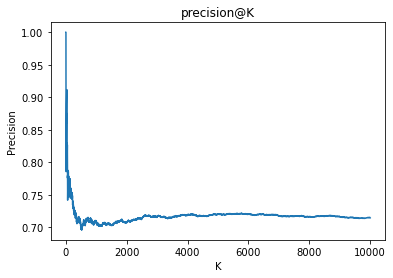

In [189]:
plt.plot([i for i in range(1, 10001)], precisions_at_k)
plt.title('precision@K')
plt.xlabel('K')
plt.ylabel('Precision')
plt.show()

## Q9

In [378]:
probs = model.predict_proba(X) 
sortedProbs = list(zip(probs ,y))

In [379]:
sortedProbs = [(abs(datum[0][1] - 0.5), not datum[1]) 
               if datum[0][1] < 0.5
               else (abs(datum[0][1] - 0.5), datum[1]) 
               for datum in sortedProbs]
sortedProbs.sort(reverse=True)

In [380]:
precisions_at_k = []
for i in range(1, 10001):
    precisions_at_k.append((sum([datum[1] for datum in sortedProbs[:i]]) / i))

#### Answer:

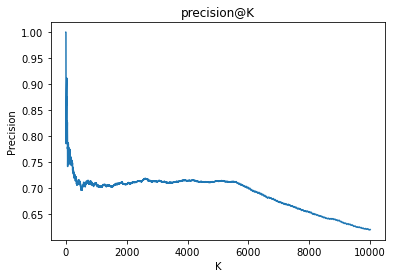

In [381]:
plt.plot([i for i in range(1, 10001)], precisions_at_k)
plt.title('precision@K')
plt.xlabel('K')
plt.ylabel('Precision')
plt.show()

In [382]:
precisions_at_k[0]

1.0

In [383]:
precisions_at_k[99]

0.75

In [384]:
precisions_at_k[10000 - 1]

0.6208